In [14]:
import tensorflow as tf
import numpy as np
import pandas as pd
#import matplotlib as mpl
import matplotlib.pyplot as plt

In [15]:
from keras.preprocessing.image import ImageDataGenerator 
train = "C:/U sers/User/Desktop/Flower recognition/Train"
test = "C:/Users/User/Desktop/Flower recognition/Test"
validation = "C:/Users/User/Desktop/Flower recognition/Validation"

In [16]:
#I want to perform image argumentation, considering the fact that i don't have too many data
train_gen = ImageDataGenerator (rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True)

In [ ]:
train_set = train_gen.flow_from_directory(train,
                                          target_size=(224,224), 
                                          batch_size=32, 
                                          class_mode='categorical')

In [18]:
validation_gen = ImageDataGenerator (rescale = 1./255)

In [ ]:
validation_set = validation_gen.flow_from_directory(validation,
                                          target_size=(224,224), 
                                          batch_size=32, 
                                          class_mode='categorical')

In [29]:
#Let me start building my model now
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=[224,224,3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
                                                                   
                                                                                                               

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu', input_shape=[224,224,3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.5))
                                                                                                               
                                                                                                               

model.add(tf.keras.layers.Conv2D(filters=96, kernel_size=(5,5), padding='same', activation='relu', input_shape=[224,224,3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.5))  
                                                                                                               
                                                                                                               
                                                                                                              
model.add(tf.keras.layers.Conv2D(filters=96, kernel_size=(5,5), padding='same', activation='relu', input_shape=[224,224,3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.5))
                                                                                                               
                                                                                                               
                                                                                                               
#After we done adding our convolutional layers, we will need to flatten the images                                                                                                               
model.add(tf.keras.layers.Flatten())
#Add two dense layer to the flatten layer
                                                                                                               
model.add(tf.keras.layers.Dense(units=512,activation='relu'))
model.add(tf.keras.layers.Dense(units=5, activation='softmax'))
                                                    
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 64)      51264     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 56, 56, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 56, 56, 96)       

model.compile(optimizer ='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [36]:
history = model.fit(x=train_set, validation_data= validation_set, batch_size=32, epochs=20,)

Epoch 1/20
80/80 [==============================] - 772s 10s/step - loss: 0.7303 - accuracy: 0.7469 - val_loss: 1.0036 - val_accuracy: 0.6784
Epoch 2/20
80/80 [==============================] - 630s 8s/step - loss: 0.6465 - accuracy: 0.7703 - val_loss: 0.9700 - val_accuracy: 0.6620
Epoch 3/20
80/80 [==============================] - 602s 8s/step - loss: 0.6526 - accuracy: 0.7656 - val_loss: 0.9042 - val_accuracy: 0.6595
Epoch 4/20
80/80 [==============================] - 452s 6s/step - loss: 0.6188 - accuracy: 0.7711 - val_loss: 0.9035 - val_accuracy: 0.6633
Epoch 5/20
80/80 [==============================] - 451s 6s/step - loss: 0.6059 - accuracy: 0.7739 - val_loss: 0.9947 - val_accuracy: 0.6608
Epoch 6/20
80/80 [==============================] - 548s 7s/step - loss: 0.6175 - accuracy: 0.7833 - val_loss: 1.3351 - val_accuracy: 0.5864
Epoch 7/20
80/80 [==============================] - 575s 7s/step - loss: 0.6221 - accuracy: 0.7840 - val_loss: 0.9689 - val_accuracy: 0.6583
Epoch 8/20
8

In [38]:
acc = history.history['accuracy']
val_acc = acc = history.history['val_accuracy']
loss = history.history['loss']

In [48]:
val_loss = history.history['val_loss']

In [3]:
from keras.utils.vis_utils import plot_model


In [ ]:
plot_model(model)

In [49]:
print(acc)
print(val_acc)

[0.6784363389015198, 0.6620428562164307, 0.6595208048820496, 0.6633039116859436, 0.6607818603515625, 0.5863808393478394, 0.6582597494125366, 0.6595208048820496, 0.6696090698242188, 0.6708701252937317, 0.6607818603515625, 0.6759142279624939, 0.6569987535476685, 0.6796973347663879, 0.6683480739593506, 0.6040353178977966, 0.6607818603515625, 0.6569987535476685, 0.6771752834320068, 0.6771752834320068]
[0.6784363389015198, 0.6620428562164307, 0.6595208048820496, 0.6633039116859436, 0.6607818603515625, 0.5863808393478394, 0.6582597494125366, 0.6595208048820496, 0.6696090698242188, 0.6708701252937317, 0.6607818603515625, 0.6759142279624939, 0.6569987535476685, 0.6796973347663879, 0.6683480739593506, 0.6040353178977966, 0.6607818603515625, 0.6569987535476685, 0.6771752834320068, 0.6771752834320068]


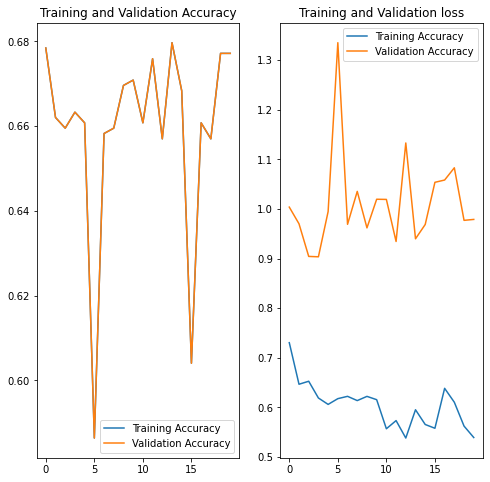

In [51]:
epochs_range = range(20)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range, loss,label='Training Accuracy')
plt.plot(epochs_range, val_loss, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')

plt.show()



In [52]:
model.save("C:/Users/User/Desktop/Flower recognition/Train/model.h5")